# Natural Language Processing:  Fake News Detection

Objective

To build a model to accurately classify a piece of news as REAL or FAKE.

This advanced python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

## **1-Importing Libraries**

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,accuracy_score


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import string
import nltk
from nltk.corpus import stopwords


from sklearn.linear_model import PassiveAggressiveClassifier
import itertools
from sklearn.ensemble import RandomForestClassifier

## **2-Getting Data**

In [4]:
df=pd.read_csv('news.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE

In [6]:
df.shape

(6335, 3)

In [56]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

**Creating a new column called "length" which is the number of words in the text column.**

In [99]:
df['length']=df['text'].apply(lambda x :len(x))

In [100]:
df.head()

,title,text,label,length
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


## 3- EDA and Visualization

Text(0, 0.5, 'Frequency')

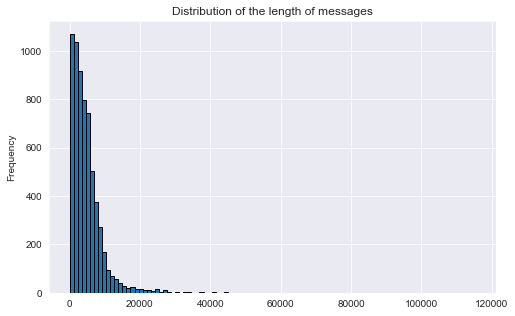

In [103]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
plt.hist(x='length', data=df,bins=100,edgecolor='black')
plt.title('Distribution of the length of messages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

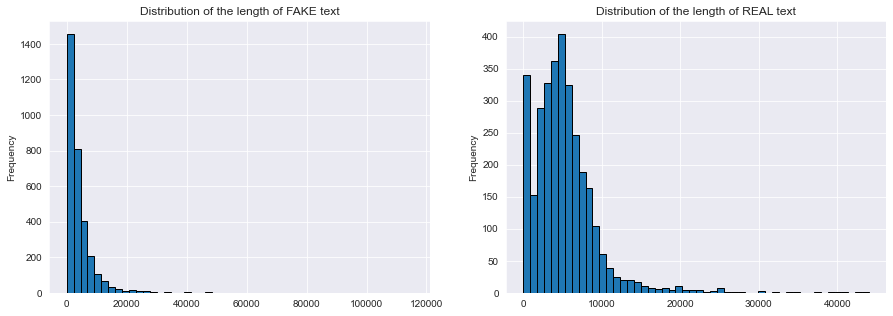

In [109]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(x='length', data=df[df['label']=='FAKE'],bins=50,edgecolor='black')
plt.title('Distribution of the length of FAKE text')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(x='length', data=df[df['label']=='REAL'],bins=50,edgecolor='black')
plt.title('Distribution of the length of REAL text')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='label', ylabel='length'>

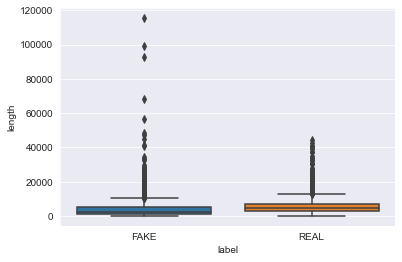

In [110]:
sns.boxplot(x='label', y='length', data=df)

<AxesSubplot:xlabel='label', ylabel='length'>

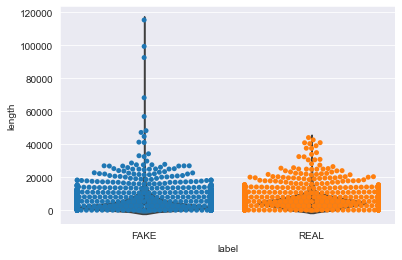

In [111]:
sns.violinplot(x='label', y='length', data=df)
sns.swarmplot(x='label', y='length', data=df)

In [112]:
sns.countplot(x='label', y='length', data=df)

TypeError: Cannot pass values for both `x` and `y`

## **4-Splitting the dataset into training and testing sets**

In [20]:
X=df['text']
y=df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## 5-NLP Classification

### 5-1- MultinomialNB Classifier without text pre-processing 

In [58]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [60]:
prediction1=pipeline.predict(X_test)

In [61]:
print(confusion_matrix(y_test,prediction1))
print('\n')
print(classification_report(y_test,prediction1))

[[409 229]
 [  4 625]]


              precision    recall  f1-score   support

        FAKE       0.99      0.64      0.78       638
        REAL       0.73      0.99      0.84       629

    accuracy                           0.82      1267
   macro avg       0.86      0.82      0.81      1267
weighted avg       0.86      0.82      0.81      1267



### 5-2- MultinomialNB Classifier with text pre-processing 

In [62]:
def my_func(y):
    return [x for x in ''.join([x for x in y if x not in string.punctuation]).split() if x.lower() not in stopwords.words('english')]

In [63]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=my_func)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()), 
])

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function my_func at 0x000001EFD7F8C438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [65]:
prediction2=pipeline.predict(X_test)

In [66]:
print(confusion_matrix(y_test,prediction2))
print('\n')
print(classification_report(y_test,prediction2))

[[403 235]
 [  3 626]]


              precision    recall  f1-score   support

        FAKE       0.99      0.63      0.77       638
        REAL       0.73      1.00      0.84       629

    accuracy                           0.81      1267
   macro avg       0.86      0.81      0.81      1267
weighted avg       0.86      0.81      0.81      1267



We can see that if we use MultinomialNB() Classifierr, text pre-processing decreases the accuracy of the model.

### 5-3- Passive Aggressive Classifier without text pre-processing  

In [67]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [68]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                          

In [69]:
prediction3=pipeline.predict(X_test)

In [70]:
print(confusion_matrix(y_test,prediction3))
print('\n')
print(classification_report(y_test,prediction3))

[[585  53]
 [ 35 594]]


              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93       638
        REAL       0.92      0.94      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



### 5-4- Passive Aggressive Classifier with text pre-processing 

In [92]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=my_func)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()), 
])

In [93]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function my_func at 0x000001EFD7F8C438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b'...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
       

In [94]:
prediction4=pipeline.predict(X_test)

In [95]:
print(confusion_matrix(y_test,prediction4))
print('\n')
print(classification_report(y_test,prediction4))

[[608  30]
 [ 28 601]]


              precision    recall  f1-score   support

        FAKE       0.96      0.95      0.95       638
        REAL       0.95      0.96      0.95       629

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



We see that if we use Passive Aggressive Classifier instead of MultinomialNB, the accuracy of our model is increased to %95 if we perform text pre-processing.

### 5-5- Random Forest Classifier without text pre-processing 

In [79]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [80]:
pipeline.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [81]:
prediction5=pipeline.predict(X_test)

In [82]:
print(confusion_matrix(y_test,prediction5))
print('\n')
print(classification_report(y_test,prediction5))

[[561  77]
 [154 475]]


              precision    recall  f1-score   support

        FAKE       0.78      0.88      0.83       638
        REAL       0.86      0.76      0.80       629

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



### 5-6- Random Forest  Classifier with text pre-processing 

In [83]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=my_func)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', RandomForestClassifier()), 
])

In [84]:
pipeline.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function my_func at 0x000001EFD7F8C438>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b'...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [87]:
prediction6=pipeline.predict(X_test)

In [88]:
print(confusion_matrix(y_test,prediction6))
print('\n')
print(classification_report(y_test,prediction6))

[[556  82]
 [113 516]]


              precision    recall  f1-score   support

        FAKE       0.83      0.87      0.85       638
        REAL       0.86      0.82      0.84       629

    accuracy                           0.85      1267
   macro avg       0.85      0.85      0.85      1267
weighted avg       0.85      0.85      0.85      1267



We see that if we use Passive Aggressive Classifier instead of MultinomialNB, the accuracy of our model is increased to %95 if we perform text pre-processing.

In [97]:
print('MultinomialNB Classifier without text pre-processing', accuracy_score(y_test,prediction1))
print('\n')
print('MultinomialNB Classifier with text pre-processing: ', accuracy_score(y_test,prediction2))
print('\n')
print('Passive Aggressive Classifier without text pre-processing: ', accuracy_score(y_test,prediction3))
print('\n')
print('Passive Aggressive Classifier with text pre-processing: ', accuracy_score(y_test,prediction4))
print('\n')
print('Random Forest Classifier without text pre-processing: ', accuracy_score(y_test,prediction5))
print('\n')
print('Random Forest Classifier with text pre-processing: ', accuracy_score(y_test,prediction6))

MultinomialNB Classifier without text pre-processing 0.8161010260457774


MultinomialNB Classifier with text pre-processing:  0.8121546961325967


Passive Aggressive Classifier without text pre-processing:  0.930544593528019


Passive Aggressive Classifier with text pre-processing:  0.9542225730071034


Random Forest Classifier without text pre-processing:  0.8176795580110497


Random Forest Classifier with text pre-processing:  0.846093133385951


We can see that the Passive Agreesive Classifier with  text pre-processing has the highest accuracy (%95).